In [497]:
import pandas as pd
df = pd.read_csv("/content/val.txt",sep=";",names=["Comments","Emotions"])
df

,Comments,Emotions
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy
...,...,...
1995,im having ssa examination tomorrow in the morn...,sadness
1996,i constantly worry about their fight against n...,joy
1997,i feel its important to share this info for th...,joy
1998,i truly feel that if you are passionate enough...,joy


In [498]:
df.isnull().sum() #NaN Values

Comments    0
Emotions    0
dtype: int64

In [499]:
df.shape

(2000, 2)

In [500]:
df.head(5)

,Comments,Emotions
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy


In [501]:
df.Emotions.value_counts

<bound method IndexOpsMixin.value_counts of 0       sadness
1       sadness
2          love
3         anger
4           joy
         ...   
1995    sadness
1996        joy
1997        joy
1998        joy
1999        joy
Name: Emotions, Length: 2000, dtype: object>

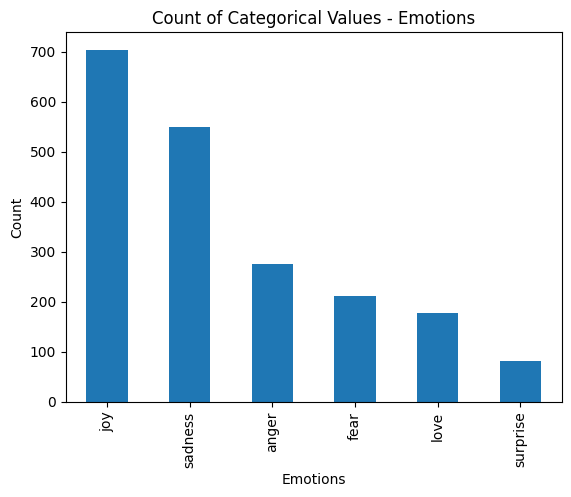

In [502]:
import matplotlib.pyplot as plt
import seaborn as sns

emotions_series = df["Emotions"].value_counts().index

# Count the occurrences of each category
category_counts = df["Emotions"].value_counts()

# Plot the count of categorical values
category_counts.plot(kind='bar')
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Count of Categorical Values - Emotions')
plt.show()

In [503]:
Emotions = {"joy":1,"sadness":2,"anger":3,"fear":4,"love":5,"surprise":6}

In [504]:
df["Emotions"] = df["Emotions"].map(Emotions)
df.Emotions.value_counts()
df.isnull().sum()

Comments    0
Emotions    0
dtype: int64

In [505]:
df.head(5)

,Comments,Emotions
0,im feeling quite sad and sorry for myself but ...,2
1,i feel like i am still looking at a blank canv...,2
2,i feel like a faithful servant,5
3,i am just feeling cranky and blue,3
4,i can have for a treat or if i am feeling festive,1


In [506]:
df["Emotions"].value_counts()

1    704
2    550
3    275
4    212
5    178
6     81
Name: Emotions, dtype: int64

In [507]:
X = df["Comments"]
y = df["Emotions"]


In [508]:


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [509]:
X_train

968     i have that feeling most days of the week im s...
240     i feel no need to offer it though i do feel a ...
819     im feeling much better and im ready to get out...
692     i cant believe this is right but i feel a lot ...
420                    im not feeling very graceful today
                              ...                        
1130    i feel so alone in the world with nobody to ta...
1294                i feel simply amazed when i look back
860     i first had cordelia i didnt feel a strong urg...
1459        i feel overwhelmed by the fast pace of cities
1126    i feel impressed by the professionalism and sp...
Name: Comments, Length: 1600, dtype: object

In [510]:
#X_train / TfIDF - Y_train

In [511]:
import nltk

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

X_train =  X_train.apply(lambda x: x.lower())
X_train = X_train.apply(lemmatize_text)

In [512]:
X_test

1860    i really feel like writing about or supporting...
353     im trying to wein off them with doctors guidan...
1333    i am continually having to dig deep within mys...
905     i want to commit to continuing to post here on...
1289                     im feeling very distracted today
                              ...                        
965                 i started to feel thankful for my bed
1284          i look in my wallet and i feel a cold chill
1739    im feeling discouraged sad angry afraid of tom...
261     i feel like a super hero now that she naps amp...
535     i feel like such a pathetic talentless unlovea...
Name: Comments, Length: 400, dtype: object

In [513]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(ngram_range= (1,2))

# Convert the training data into feature vectors
X_train = tfidf.fit_transform([' '.join(doc) for doc in X_train])

# Convert the test data into feature vectors
X_test = tfidf.transform([' '.join(doc) for doc in X_test])

# Print the feature vectors
print("Training data feature vectors:")
print(X_train.toarray())

print("\nTest data feature vectors:")
print(X_test.toarray())

Training data feature vectors:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Test data feature vectors:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [514]:
X_train.shape

(1600, 20699)

In [515]:
X_test.shape

(400, 20699)

In [516]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

In [517]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [518]:
y_pred = rf.predict(X_test)

In [519]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.3175


In [520]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
accuracy_1 = print("Accuracy: ", accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.32      1.00      0.48       127
           2       0.00      0.00      0.00       118
           3       0.00      0.00      0.00        51
           4       0.00      0.00      0.00        46
           5       0.00      0.00      0.00        46
           6       0.00      0.00      0.00        12

    accuracy                           0.32       400
   macro avg       0.05      0.17      0.08       400
weighted avg       0.10      0.32      0.15       400

Accuracy:  0.3175


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [483]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Assuming you have already split your data into X_train, X_test, y_train, y_test

# Create a RandomForestClassifier instance
rf_classifier = RandomForestClassifier()

# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model from grid search
best_rf_classifier = grid_search.best_estimator_

# Evaluate the best model on the test set
test_accuracy = best_rf_classifier.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Test Accuracy: 0.3175


In [486]:
test_accuracy = best_rf_classifier.score(X_test, y_test)
test_accuracy

0.3175

In [521]:
from sklearn.ensemble import GradientBoostingClassifier
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
gb_clf = GradientBoostingClassifier()
for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))

Learning rate:  0.05
Accuracy score (training): 0.361
Learning rate:  0.075
Accuracy score (training): 0.361
Learning rate:  0.1
Accuracy score (training): 0.375
Learning rate:  0.25
Accuracy score (training): 0.401
Learning rate:  0.5
Accuracy score (training): 0.403
Learning rate:  0.75
Accuracy score (training): 0.404
Learning rate:  1
Accuracy score (training): 0.405


In [522]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)


classifier = XGBClassifier()
classifier.fit(X = X_train,y =  y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
y_pred = le.inverse_transform(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[127   0   0   0   0   0]
 [118   0   0   0   0   0]
 [ 51   0   0   0   0   0]
 [ 46   0   0   0   0   0]
 [ 46   0   0   0   0   0]
 [ 12   0   0   0   0   0]]


0.3175

In [528]:
from sklearn.model_selection import cross_val_score

# Assuming you have a trained model called 'model' and input features (X) and labels (y)
scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)  # 5-fold cross-validation

print(f"Cross-Validation Scores: {scores}")
print(f"Mean Score: {scores.mean()}")

Cross-Validation Scores: [0.415625 0.40625  0.428125 0.4375   0.46875 ]
Mean Score: 0.43125
